# Implementing the Gradient Descent Algorithm

In [33]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Functions for plotting and drawing lines

def plot_points(X,y):
    admitted = X[np.argwhere(y == 1)]
    rejected = X[np.argwhere(y == 0)]
    plt.scatter([s[0][0] for s in rejected], [s[0][1] for s in rejected], s = 25, color = 'blue', edgecolor = 'k')
    plt.scatter([s[0][0] for s in admitted], [s[0][1] for s in admitted], s = 25, color = 'red', edgecolor = 'k')
    
def disply(m, b, color = 'g--'):
    plt.xlim(-0.05, 1.05)
    plt.ylim(-0.05, 1.05)
    x = np.arange(-10, 10, 0.1)
    plt.plot(x, m*x+b, color)

## Reading and plotting the data

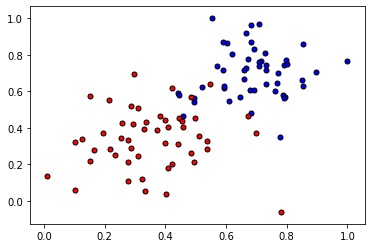

In [34]:
data = pd.read_csv('data.csv', header = None)
X = np.array(data[[0,1]])
y = np.array(data[2])
plot_points(X,y)
plt.show()

## TODO: Implementing the basic functions
Implementation of the necessary formulas and functions
- Sigmoid activation function

$$\sigma(x) = \frac{1}{1+e^{-x}}$$

- Output (prediction) formula

$$\hat{y} = \sigma(w_1 x_1 + w_2 x_2 + b)$$

- Error function

$$Error(y, \hat{y}) = - y \log(\hat{y}) - (1-y) \log(1-\hat{y})$$

- The function that updates the weights

$$ w_i \longrightarrow w_i + \alpha (y - \hat{y}) x_i$$

$$ b \longrightarrow b + \alpha (y - \hat{y})$$

In [35]:
# Sigmoid Activation function
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def prediction_formula(features, weights, bias):
    return sigmoid(np.dot(features, weights) + bias)

def error_formula(y, y_hat):
    return -(y - y_hat) - ((1 - y) * np.log(1 - y_hat))

def update_weights(x, y, weights, bias, learn_rate):
    y_hat = prediction_formula(x, weights, bias)
    gd_error = -(y - y_hat)
    weights -= learn_rate * gd_error * x
    bias -= learn_rate * gd_error
    return weights, bias

## Training function
This function will help us iterate the gradient descent algorithm through all the data, for a number of epochs. It will also plot the data, and some of the boundary lines obtained as we run the algorithm.

In [36]:
np.random.seed(42)

epochs = 100
learn_rate = 0.01

def train(features, targets, epochs, learn_rate, graph_lines = False):
    
    errors = []
    n_records, n_features = features.shape
    last_loss = None
    weights = np.random.normal(scale = 1 / n_features**0.5, size = n_features)
    bias = 0
    for e in range(epochs):
        delta_w = np.zeros(weights.shape)
        for x, y in zip(features, targets):
            output = prediction_formula(x, weights, bias)
            error = error_formula(y, output)
            weights, bias = update_weights(x,y,weights, bias, learn_rate)
            
        # Print out the log-loss error on the training set
        out = prediction_formula(features, weights, bias)
        loss = np.mean(error_formula(targets, out))
        errors.append(loss)
        if e % (epochs / 10) == 0:
            print('\n============= Epoch', e,'===========')
            if last_loss and last_loss < loss:
                print('Train loss: ', loss, '  WARNING - Loss Increasing')
            else:
                print('Train Loss: ', loss)
            last_loss = loss
            predictions = out > 0.5
            accuracy = np.mean(predictions == targets)
            print('Accuracy: ', accuracy)
        if graph_lines and e % (epochs / 100) == 0:
            display(-weights[0] / weights[1], -bias / weights[1])
            
    # Plot the solution boundary
    plt.title('Solution Boundary')
    display(-weights[0] / weights[1], -bias / weights[1], 'black')
    
    # Plot the data
    plot_points(features, targets)
    plt.show()
    
    # Plot the error
    plt.title('Error plot')
    plt.xlabel('Number of epochs')
    plt.ylabel('Error')
    plt.plot(errors)
    plt.show




============= Epoch 0 ===========
Train Loss:  0.32463911918006744
Accuracy:  0.52


1.0991774570048383

-0.2586571053466806

0.4614874100293467

-0.23882914100865388

0.16701771808851004

-0.17407623827263172

-0.005003397846578773

-0.09939866288858416

-0.119624223261589

-0.025131212016968517

-0.2027318297344784

0.04494144889784796

-0.26660034277858924

0.10945595047664093

-0.3177748031406237

0.1681061398824113

-0.3600593028408668

0.22107809713779422

-0.39581867052302605

0.26878140774890397


============= Epoch 10 ===========
Train Loss:  0.1304431860402505
Accuracy:  0.58


-0.4266057623809048

0.3117115558363493

-0.4534879693471095

0.35037780997119383

-0.4772279158678757

0.38526630891524277

-0.49838866909904345

0.4168227431066529

-0.5173977126380078

0.4454460005972964

-0.5345873585859581

0.47148781303026827

-0.5502211622890223

0.49525550409758146

-0.5645117295833962

0.5170161560065367

-0.5776330629636266

0.5370012349279824

-0.5897293421601185

0.5554111516488938


============= Epoch 20 ===========
Train Loss:  0.11886777368052769
Accuracy:  0.74


-0.6009213141741324

0.5724194926036067

-0.6113110407330259

0.5881768075886007

-0.6209854911811746

0.6028139258434201

-0.6300193066884628

0.6164448178682297

-0.6384769581858549

0.629169042492278

-0.6464144529534246

0.6410738272497227

-0.6538806998570906

0.6522358311179133

-0.6609186127263771

0.6627226357623862

-0.6675660102676806

0.672594006745057

-0.6738563560577772

0.6819029608992327


============= Epoch 30 ===========
Train Loss:  0.11273358383999225
Accuracy:  0.83


-0.679819371537111

0.6906966709122911

-0.6854815472025936

0.6990172334086853

-0.6908665715102802

0.7069023226259435

-0.6959956927499289

0.7143857481517147

-0.7008880259424007

0.7214979321120608

-0.7055608143568763

0.7282663186161903

-0.7100296533501461

0.7347157261071842

-0.7143086827537307

0.7408686514792757

-0.718410752874084

0.7467455333417194

-0.7223475682518139

0.7523649805857534


============= Epoch 40 ===========
Train Loss:  0.10804971930285497
Accuracy:  0.91


-0.7261298125924096

0.7577439714005945

-0.7297672576917896

0.7628980270492406

-0.7332688587039169

0.7678413640241029

-0.7366428377107752

0.7725870276302564

-0.7398967572388065

0.777147009569213

-0.7430375851063347

0.7815323517012088

-0.7460717517722598

0.7857532378347649

-0.7490052011789022

0.7898190751172494

-0.7518434359341603

0.793738566369668

-0.754591557554845

0.7975197745153842


============= Epoch 50 ===========
Train Loss:  0.10429769270138096
Accuracy:  0.93


-0.7572543023896279

0.8011701800894295

-0.7598360737530367

0.804696732677397

-0.7623409707284805

0.8081058970163565

-0.7647728140360821

0.8114036943912601

-0.7671351693082202

0.8145957398760667

-0.7694313680706766

0.8176872758969294

-0.7716645266887787

0.8206832025332809

-0.7738375635049469

0.8235881049198629

-0.7759532143657382

0.8264062780674252

-0.7780140467120543

0.8291417493806795


============= Epoch 60 ===========
Train Loss:  0.10119887659914417
Accuracy:  0.92


-0.7800224723851391

0.8317982991183335

-0.7819807592827058

0.8343794790107785

-0.7838910419837568

0.8368886292256073

-0.785755331446875

0.8393288938491075

-0.7875755238747938

0.8417032350325686

-0.789353408827566

0.8440144459355238

-0.7910906766575289

0.8462651625832868

-0.7927889253311945

0.8484578747432832

-0.7944496666961868

0.8505949359133683

-0.7960743322451075

0.8526785725053355


============= Epoch 70 ===========
Train Loss:  0.09857736916464732
Accuracy:  0.93


-0.79766427842276

0.8547108922980682

-0.7992207915183428

0.8566938922270231

-0.8007450921799256

0.85862946556988

-0.8022383395847633

0.8605194085821103

-0.803701635295629

0.8623654266308438

-0.8051360268303626

0.8641691398706092

-0.8065425109691885

0.8659320885002523

-0.8079220368219608

0.8676557376365676

-0.8092755086754208

0.8693414818367415

-0.810603788638604

0.8709906492987107


============= Epoch 80 ===========
Train Loss:  0.09631752937433674
Accuracy:  0.93


-0.8119076991028992

0.8726045057657932

-0.8131880250317086

0.8741842581595508

-0.8144455160933

0.8757310579626155

-0.8156808886492306

0.8772460043712867

-0.8168948276096114

0.8787301472359117

-0.8180879881654863

0.8801844898054959

-0.8192609974077176

0.8816099912915334

-0.8204144558409346

0.8830075692647601

-0.8215489388004072

0.8843781018973651

-0.8226649977790068

0.8857224300621244


============= Epoch 90 ===========
Train Loss:  0.0943403914679677
Accuracy:  0.93


-0.823763161670851

0.8870413592989789

-0.8248439379376552

0.8883356616586796

-0.8259078137033434

0.8896060774323649

-0.8269552567820043

0.8908533167751888

-0.8279867166438846

0.8920780612314778

-0.8290026253237265

0.8932809651682979

-0.8300033982754288

0.8944626571237734

-0.8309894351766867

0.895623741075991

-0.8319611206870022

0.8967647976378862

-0.832918825162181

0.8978863851830877

-0.832918825162181

0.8978863851830877

'black'

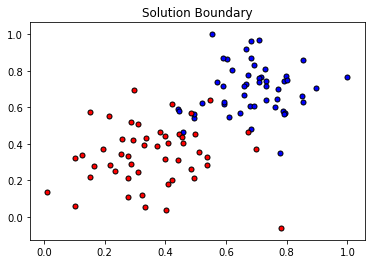

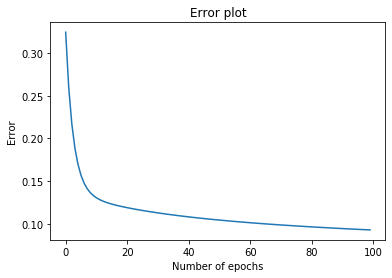

In [37]:
train(X,y,epochs, learn_rate, True)